### In case of positive hydrostatic strain i.e $\text{tr}(\boldsymbol{\epsilon})\geq 0$
$\langle p \rangle_+ = p = \boldsymbol{I}: \boldsymbol{\sigma}_{vol} = \boldsymbol{I}: \mathbb{I}_{vol}\mathbb{C}  \boldsymbol{\epsilon}$    and      $\langle p \rangle_- = 0 $

$\mathbb{C}_{mod} = \mathbb{C}_{+} = s^2\left(\mathbb{I}_{vol}\mathbb{C} + \mathbb{I}_{dev}\mathbb{C}\right) = s^2 \mathbb{C}$

### In case of negative hydrostatic strain $\text{tr}(\boldsymbol{\epsilon})< 0$
$\langle p \rangle_+ = 0 $   and    $\langle p \rangle_- = p =  \boldsymbol{I}: \boldsymbol{\sigma}_{vol} = \boldsymbol{I}:\mathbb{I}_{vol}\mathbb{C}  \boldsymbol{\epsilon}$

$\mathbb{C}_{mod} = \mathbb{C}_{-} = s^2\bigl(\mathbb{I}_{dev}\mathbb{C}\bigr) + \mathbb{I}_{vol}\mathbb{C}$

 ## Strong Form in terms of $\mathbb{C}_{mod}$ and $\mathcal{H}(\mathcal{E})$
 
 $\nabla \cdot \boldsymbol{\sigma} = {\bf{0}}$
 
 $ \nabla\cdot \boldsymbol{D}  = {0}$

 $ \nabla \cdot \biggl(G_cl\boldsymbol{A}\nabla s\biggr) - 2s\mathcal{H}(\mathcal{E})  + \frac{G_c}{l}\left(1-s\right) = 0$

where 

$\boldsymbol{\sigma} = \biggl(\mathbb{C}_{mod} \boldsymbol{\epsilon} -\mathbb{e}_{mod}^T\boldsymbol{E}\biggr) $

$\boldsymbol{D} = \biggr({\boldsymbol{K}_{mod}\boldsymbol{E}} +  \mathbb{e}_{mod}\boldsymbol{\epsilon}\biggl) $

$\mathcal{E} = \frac{1}{2}\biggl(\langle p \rangle_+\boldsymbol{I}:\mathbb{I}_{vol}\boldsymbol{\epsilon} + \mathbb{I}_{dev}\mathbb{C}\boldsymbol{\epsilon}:\mathbb{I}_{dev}\boldsymbol{\epsilon} + \boldsymbol{E} \cdot \boldsymbol{K}\boldsymbol{E} + \boldsymbol{\epsilon}:\mathbb{e}^T\boldsymbol{E}\biggr)$

$\mathcal{H}(f) = \text{max}_{\tau \in [0,t]}f(\tau)$

$\mathbb{e}_{mod} = s^2 \mathbb{e}$

$\boldsymbol{K}_{mod} = s^2 \boldsymbol{K}$

 # Weak Form

### For Piezo-elasticity part

 $a((\boldsymbol{u},\phi), ({\boldsymbol{v}},{\psi})) = \int_{\Omega} \bigl( \mathbb{C}_{mod}\mathbb{\epsilon}: \nabla \boldsymbol{v} \bigr)d\Omega - \int_\Omega \bigl ( \boldsymbol{e}_{mod}^T\boldsymbol{E}:\nabla \boldsymbol{v}\bigr)d\Omega + \int_{\Omega}\left(\boldsymbol{K}_{mod}\boldsymbol{E} \cdot \nabla \boldsymbol{\psi}\right) + \int_{\Omega}\left(\mathbb{e}_{mod}\boldsymbol{\epsilon}  \cdot \nabla  \boldsymbol{\psi}\right)d\Omega$

### For phase-field part
 
 $ a(s,\phi) = \int_{\Omega}\bigl(G_cl\nabla s \cdot \nabla \phi + 2s \phi\mathcal{H}({\mathcal{E}}) +  \frac{G_c}{l} s \phi\bigr)d\Omega$

 $ l(\phi) = \int_{\Omega}\frac{G_c}{l}\phi d{\Omega}$

In [1]:
using Gmsh: gmsh
using GridapGmsh
using Gridap
using Gridap.TensorValues
using Plots

In [2]:
using SymPy

x,x₁,y = symbols("x,x₁,y", real = true)

heaviside(x) = 0.5 * (sign(x) + 1)
interval(x, a, b) = heaviside(x-a) - heaviside(x-b)

interval (generic function with 1 method)

## Definitions of Tensorial Quantities:

$\boldsymbol{I} = \delta_{ij} \boldsymbol{e}_i\otimes\boldsymbol{e}_j$

$\mathbb{I} = \boldsymbol{I}\otimes\boldsymbol{I}$

$\mathbb{I}_{sym} = \frac{1}{2}\biggl(\mathbb{I}+\mathbb{I}^T\biggr)$

$\mathbb{I}_{skw} = \frac{1}{2}\biggl(\mathbb{I}-\mathbb{I}^T\biggr)$

$\mathbb{I}_{vol} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)$

$\mathbb{I}_{dev} = \mathbb{I}_{sym} - \mathbb{I}_{vol}$

$\boldsymbol{\epsilon}_{vol} = \frac{1}{3}\text{tr}(\boldsymbol{\epsilon}) \boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{\epsilon}:\boldsymbol{I}\biggr)\boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)\boldsymbol{\epsilon} = \mathbb{I}_{vol} \boldsymbol{\epsilon} $

$\boldsymbol{\epsilon}_{dev} = \boldsymbol{\epsilon} - \boldsymbol{\epsilon}_{vol} = \biggl(\mathbb{I}_{sym} -  \mathbb{I}_{vol}\biggl) \boldsymbol{\epsilon} = \mathbb{I}_{dev} \boldsymbol{\epsilon}$

$\boldsymbol{\sigma}_{vol} = p \boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{\sigma}:\boldsymbol{I}\biggr)\boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)\boldsymbol{\sigma} = \mathbb{I}_{vol} \boldsymbol{\sigma} = \mathbb{I}_{vol}\mathbb{C} \boldsymbol{\epsilon}$

$\boldsymbol{\sigma}_{dev} = \boldsymbol{\sigma} - \boldsymbol{\sigma}_{vol} = \biggl(\mathbb{I}_{sym} -  \mathbb{I}_{vol}\biggl) \boldsymbol{\sigma} = \mathbb{I}_{dev} \boldsymbol{\sigma}=\mathbb{I}_{dev} \mathbb{C} \boldsymbol{\epsilon}$

In [3]:
I2 = SymTensorValue{2,Float64}(1.0 ,0.0 ,1.0)
I4 = I2⊗I2
I4_sym = one(SymFourthOrderTensorValue{2,Float64})
I4_vol = (1.0/2)*I4
I4_dev = I4_sym  - I4_vol

SymFourthOrderTensorValue{2, Float64, 9}(0.6666666666666667, 0.0, -0.3333333333333333, 0.0, 0.5, 0.0, -0.3333333333333333, 0.0, 0.6666666666666667)

In [4]:
const L = 19.1e-3
const LL = 0.5*L
const SO = 1e-3
#const SI = 0.05
const H = 9e-3
const CH = 4e-3       #Crack height
const CW = 0.46e-3    #Crack Width
const lsp = 0.1e-3   #length factor
const hf = 0.06e-3/2.1 #Mesh size parameter
const hfc = 0.06e-3/50 #Mesh size parameter
const h = 50*hf    #Mesh size parameter
const LW = CW
const FMR = CW/2

gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)
p1 = gmsh.model.geo.addPoint(0.0, 0.0, 0.0, h)
p2 = gmsh.model.geo.addPoint(SO, 0, 0.0, h)
p3 = gmsh.model.geo.addPoint(LL-0.5*CW, 0, 0.0, h)
p4 = gmsh.model.geo.addPoint(LL-0.5*CW, CH-CW, 0.0, h)
p5 = gmsh.model.geo.addPoint(LL, CH, 0.0, hfc)
p6 = gmsh.model.geo.addPoint(LL+0.5*CW, CH-CW, 0.0, h)
p7 = gmsh.model.geo.addPoint(LL+0.5*CW,0.0, 0.0, h)
p8 = gmsh.model.geo.addPoint(L-SO,0.0, 0.0, h)
p9 = gmsh.model.geo.addPoint(L,0.0, 0.0, h)
p10 = gmsh.model.geo.addPoint(L, H, 0.0, h)
p11 = gmsh.model.geo.addPoint((L/2)+LW, H , 0.0, h)
p12 = gmsh.model.geo.addPoint((L/2)-LW, H , 0.0, h)
p13 = gmsh.model.geo.addPoint(0, H , 0.0, h)

l1 = gmsh.model.geo.addLine(p1, p2)
l2 = gmsh.model.geo.addLine(p2, p3)
l3 = gmsh.model.geo.addLine(p3, p4)
l4 = gmsh.model.geo.addLine(p4, p5)
l5 = gmsh.model.geo.addLine(p5, p6)
l6 = gmsh.model.geo.addLine(p6, p7)
l7 = gmsh.model.geo.addLine(p7, p8)
l8 = gmsh.model.geo.addLine(p8, p9)
l9 = gmsh.model.geo.addLine(p9, p10)
l10 = gmsh.model.geo.addLine(p10, p11)
l11 = gmsh.model.geo.addLine(p11, p12)
l12 = gmsh.model.geo.addLine(p12, p13)
l13 = gmsh.model.geo.addLine(p13, p1)                 

cl1 = gmsh.model.geo.addCurveLoop([l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13]) 

ps1 = gmsh.model.geo.addPlaneSurface([cl1])

pg1 = gmsh.model.addPhysicalGroup(2, [ps1])

pg2 = gmsh.model.addPhysicalGroup(0, [p2])
pg3 = gmsh.model.addPhysicalGroup(0, [p8])
pg4 = gmsh.model.addPhysicalGroup(1, [l11])
pg5 = gmsh.model.addPhysicalGroup(1, [l13])
pg6 = gmsh.model.addPhysicalGroup(1, [l9])

gmsh.model.setPhysicalName(2, pg1, "Domain")
gmsh.model.setPhysicalName(0, pg2, "DirichletLeft")
gmsh.model.setPhysicalName(0, pg3, "DirichletRight")
gmsh.model.setPhysicalName(1, pg4, "LoadLine")
gmsh.model.setPhysicalName(1, pg5, "ElectricPotentialTempLeft")
gmsh.model.setPhysicalName(1, pg6, "ElectricPotentialTempRight")

gmsh.model.mesh.field.add("Box", 11)
gmsh.model.mesh.field.setNumber(11, "VIn", hf)
gmsh.model.mesh.field.setNumber(11, "VOut", h)
gmsh.model.mesh.field.setNumber(11, "XMin", (LL-5*FMR))
gmsh.model.mesh.field.setNumber(11, "XMax", ((L/2)+LW+2*FMR))
gmsh.model.mesh.field.setNumber(11, "YMin", 0.95*CH)
gmsh.model.mesh.field.setNumber(11, "YMax", H)

gmsh.model.mesh.field.setAsBackgroundMesh(11)

gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)
gmsh.write("threepointbendinghorizontal.msh")
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 30%] Meshing curve 4 (Line)
Info    : [ 40%] Meshing curve 5 (Line)
Info    : [ 40%] Meshing curve 6 (Line)
Info    : [ 50%] Meshing curve 7 (Line)
Info    : [ 60%] Meshing curve 8 (Line)
Info    : [ 70%] Meshing curve 9 (Line)
Info    : [ 70%] Meshing curve 10 (Line)
Info    : [ 80%] Meshing curve 11 (Line)
Info    : [ 90%] Meshing curve 12 (Line)
Info    : [100%] Meshing curve 13 (Line)
Info    : Done meshing 1D (Wall 0.0024743s, CPU 0.002391s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.352768s, CPU 0.3333s)
Info    : 12488 nodes 24987 elements
Info    : Writing 'threepointbendinghorizontal.msh'...
Info    : Done writing 'threepointbendinghorizontal.msh'


In [5]:
model = GmshDiscreteModel("threepointbendinghorizontal.msh")
writevtk(model,"threepointbendinghorizontal")

Info    : Reading 'threepointbendinghorizontal.msh'...
Info    : 27 entities
Info    : 12488 nodes
Info    : 24875 elements
Info    : Done reading 'threepointbendinghorizontal.msh'


3-element Vector{Vector{String}}:
 ["threepointbendinghorizontal_0.vtu"]
 ["threepointbendinghorizontal_1.vtu"]
 ["threepointbendinghorizontal_2.vtu"]

In [6]:
cd("ResultNotchedPlateElecField_50")

In [7]:
const T0 = 300
const TAppMax = T0 + 50

#const ElecF = 0
const phiMaxApp = 20000.0
const phiMin = 0.0

const delt = 1
const tMax = 100
const uMax = 18e-6
const AppVel = uMax/tMax
const uMin = 0

uTran_Temp = 0.2*uMax
uTran2_EP = 0.05*uMax

9.000000000000001e-7

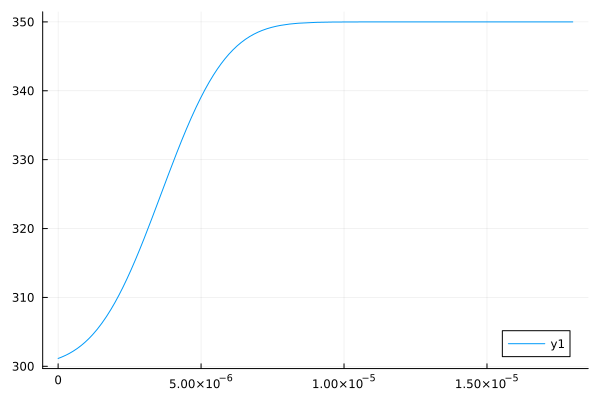

In [8]:
hS = uMax/10
F_Temp(x) = (T0 - TAppMax) * interval(x,-4*hS+uMin,uTran_Temp)
wₕ(x,x₁) = (1/(sqrt(2*pi)*hS))*exp(-(x-x₁)^2/(2*hS^2))
smoothT = SymPy.integrate(F_Temp(x₁)*wₕ(x,x₁),(x₁,-4*hS,uMax)) +  TAppMax
plot(smoothT,0,uMax)

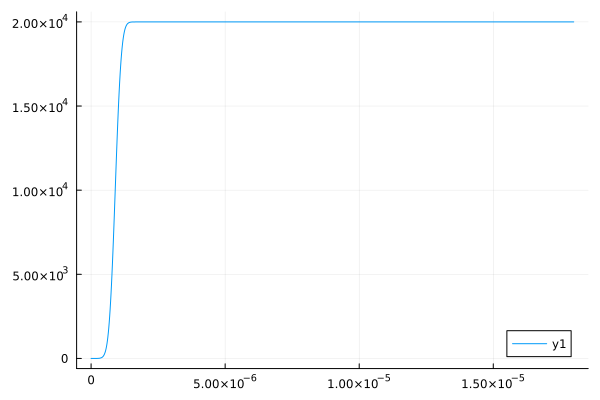

In [9]:
hS_pf = uMax/100
F_ϕ(x) = (phiMin - phiMaxApp) * interval(x,-4*hS_pf+uMin,uTran2_EP)
wₕ(x,x₁) = (1/(sqrt(2*pi)*hS_pf))*exp(-(x-x₁)^2/(2*hS_pf^2))
smoothϕ = SymPy.integrate(F_ϕ(x₁)*wₕ(x,x₁),(x₁,-4*hS_pf,uMax)) +  phiMaxApp
plot(smoothϕ,0,uMax)

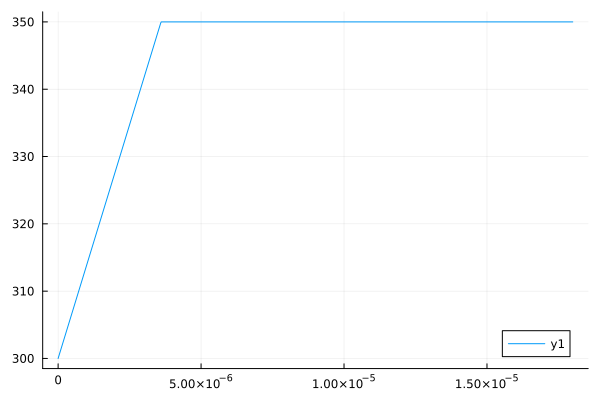

In [10]:
function Tfun(u)  
    if u <= uTran_Temp
      return ((TAppMax - T0)/uTran_Temp)*u + T0
    else
     return  TAppMax
    end
end 
plot(Tfun,0,uMax)

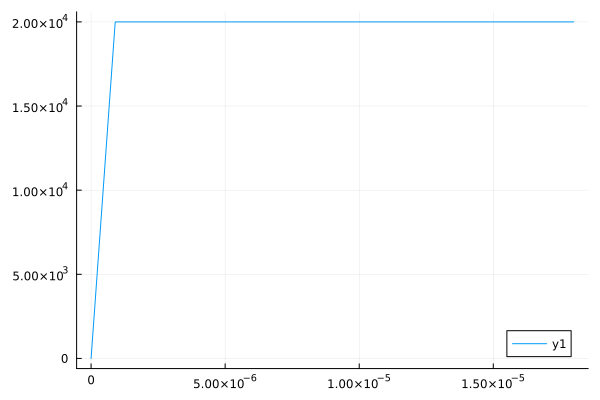

In [11]:
function ϕ_fun(ϕ)  
    if ϕ <= uTran2_EP
      return ((phiMaxApp - phiMin)/uTran2_EP)*ϕ + phiMin
    else
     return  phiMaxApp
    end
end 
plot(ϕ_fun,0,uMax)

In [12]:
uAppVec = range(0,uMax,length = Int64(floor(tMax/delt)))

AppTOption = 1 ## 1 for smooth and otherwise linear than constant

if AppTOption == 1
    TAppVec = smoothT.(uAppVec)
  else
    TAppVec = Tfun.(uAppVec) 
end 

AppϕOption = 2 ## 1 for smooth and otherwise linear than constant

if AppϕOption == 1
    ϕAppVec = smoothϕ.(uAppVec)
  else
    ϕAppVec = ϕ_fun.(uAppVec) 
end 

100-element Vector{Float64}:
     0.0
  4040.4040404040406
  8080.808080808081
 12121.212121212122
 16161.616161616163
 20000.0
 20000.0
 20000.0
 20000.0
 20000.0
 20000.0
 20000.0
 20000.0
     ⋮
 20000.0
 20000.0
 20000.0
 20000.0
 20000.0
 20000.0
 20000.0
 20000.0
 20000.0
 20000.0
 20000.0
 20000.0

In [13]:
using Gridap.Geometry
labels = get_face_labeling(model)
dimension = 2
mat_tags = get_face_tag(labels,dimension)

24826-element Vector{Int8}:
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6
 ⋮
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6

In [14]:
const Mat_tag = get_tag_from_name(labels,"Domain")

6

In [15]:
order = 1
degree = 2*order

2

In [16]:
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)

Measure()

In [17]:
reffe = ReferenceFE(lagrangian,Float64,order)
V1  = FESpace(model,reffe;conformity=:H1)

UnconstrainedFESpace()

In [18]:
p = get_cell_points(Ω)

CellPoint()

In [19]:
Property(B,P,y) = (((B-P)/L)*y)+P

Property (generic function with 1 method)

## Input paramters for Piezo-Electric Material Properties

#### Input elasticity parameters

In [20]:
c_p = lambdify(Property(421,350,y))
ρ_p = lambdify(Property(5700,7500,y))

c_i(p) = c_p.(p[1])
ρ_i(p) = ρ_p.(p[1])

c = interpolate_everywhere(c_i,V1)
ρ = interpolate_everywhere(ρ_i,V1)

SingleFieldFEFunction():
 num_cells: 24826
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 17172206463743120248

#### Input fracture parameters

In [21]:
Gc_p = lambdify(Property(200,300,y))
Gc_i(p) = Gc_p.(p[1])
Gc = interpolate_everywhere(Gc_i,V1)


const η = 1e-8

1.0e-8

## COnstitutive Matrices

### Elastic stiffness tensor

In [22]:
const C₁₁_mat_B = 166e9
const C₁₂_mat_B = 78e9
const C₂₂_mat_B = 162e9
const C₆₆_mat_B = 43e9

const C₁₁_mat_P = 139e9
const C₁₂_mat_P = 74.3e9
const C₂₂_mat_P = 113e9
const C₆₆_mat_P = 25.6e9

C₁₁_mat_p = lambdify(Property(C₁₁_mat_B,C₁₁_mat_P,y))
C₁₂_mat_p = lambdify(Property(C₁₂_mat_B,C₁₂_mat_P,y))
C₂₂_mat_p = lambdify(Property(C₂₂_mat_B,C₂₂_mat_P,y))
C₆₆_mat_p = lambdify(Property(C₆₆_mat_B,C₆₆_mat_P,y))

C₁₁_Mat(p) = C₁₁_mat_p.(p[1])
C₁₂_Mat(p) = C₁₂_mat_p.(p[1])
C₂₂_Mat(p) = C₂₂_mat_p.(p[1])
C₆₆_Mat(p) = C₆₆_mat_p.(p[1])

C₁₁_mat = interpolate_everywhere(C₁₁_Mat,V1)
C₁₂_mat = interpolate_everywhere(C₁₂_Mat,V1)
C₂₂_mat = interpolate_everywhere(C₂₂_Mat,V1)
C₆₆_mat = interpolate_everywhere(C₆₆_Mat,V1)

SingleFieldFEFunction():
 num_cells: 24826
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 17172206463743120248

In [23]:
function ElasFourthOrderConstTensor(C₁₁,C₁₂,C₂₂,C₆₆)
      C1111 = C₁₁
      C1122 = C₁₂
      C1112 = 0.0
      C2222 = C₂₂
      C2212 = 0.0
      C1212 = C₆₆    
      C_ten = SymFourthOrderTensorValue(C1111,C1112,C1122,C1112,C1212,C2212,C1122,C2212,C2222)
    return  C_ten
end

ElasFourthOrderConstTensor (generic function with 1 method)

### Third order piezoelectric tensor

In [24]:
e₂₁_mat_B = -4.4
e₂₂_mat_B = 18.6
e₁₆_mat_B = 11.6

e₂₁_mat_P = -6.98
e₂₂_mat_P = 13.84
e₁₆_mat_P = 13.44

e₂₁_mat_p = lambdify(Property(e₂₁_mat_B,e₂₁_mat_P,y))
e₂₂_mat_p = lambdify(Property(e₂₂_mat_B,e₂₂_mat_P,y))
e₁₆_mat_p = lambdify(Property(e₁₆_mat_B,e₁₆_mat_P,y))

e₂₁_mat_i(p) = e₂₁_mat_p.(p[1])
e₂₂_mat_i(p) = e₂₂_mat_p.(p[1])
e₁₆_mat_i(p) = e₁₆_mat_p.(p[1])

e₁₆_mat_i (generic function with 1 method)

In [25]:
e₂₁_mat = interpolate_everywhere(e₂₁_mat_i,V1)
e₂₂_mat = interpolate_everywhere(e₂₂_mat_i,V1)
e₁₆_mat = interpolate_everywhere(e₁₆_mat_i,V1)

SingleFieldFEFunction():
 num_cells: 24826
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 17172206463743120248

In [26]:
function PiezoThirdOrderConstTensor(e₂₁,e₂₂,e₁₆)
    # 1 for Plane Stress and 2 Plane Strain Condition 
      e111 = 0.0
      e112 = e₁₆
      e121 = e₁₆
      e122 = 0.0
      e211 = e₂₁
      e212 = 0.0
      e221 = 0.0
      e222 = e₂₂   
    vals = zeros(2,2,2);
    vals[1,:,:] .= [e111 e112
                    e121 e122]
    vals[2,:,:] .= [e211 e212
                    e221 e222]
    Q = [0 1; -1 0]
    E = zeros(2,2,2)
    for i=1:2, j=1:2, k=1:2
        for m=1:2, n=1:2, o=1:2
            E[i,j,k] = E[i,j,k] + Q[i,m]*Q[j,n]*Q[k,o]*vals[m,n,o]
        end
    end
    e_ten = ThirdOrderTensorValue(E)
    return  e_ten
end

PiezoThirdOrderConstTensor (generic function with 1 method)

### Second order electrical permittivity tensor

In [27]:
K₁₁_mat_p = lambdify(Property(11.2e-9,6e-9,y))
K₂₂_mat_p = lambdify(Property(12.6e-9,6e-9,y))

K₁₁_mat_i(p) = K₁₁_mat_p.(p[1])
K₂₂_mat_i(p) = K₂₂_mat_p.(p[1])

K₁₁_mat = interpolate_everywhere(K₁₁_mat_i,V1)
K₂₂_mat = interpolate_everywhere(K₂₂_mat_i,V1)

SingleFieldFEFunction():
 num_cells: 24826
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 17172206463743120248

In [28]:
K_mat(K₁₁,K₂₂) = TensorValue(K₁₁,0.0,0.0, K₂₂)

K_mat (generic function with 1 method)

### Thermal Coefficient

In [29]:
α₁₁_mat_p = lambdify(Property(15.7e-6,2.62e-6,y))
α₂₂_mat_p = lambdify(Property(6.4e-6,1.97e-6,y))

α₁₁_mat_i(p) = α₁₁_mat_p.(p[1])
α₂₂_mat_i(p) = α₂₂_mat_p.(p[1])

α₁₁_mat = interpolate_everywhere(α₁₁_mat_i,V1)
α₂₂_mat = interpolate_everywhere(α₂₂_mat_i,V1)

SingleFieldFEFunction():
 num_cells: 24826
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 17172206463743120248

In [30]:
α_mat(α₁₁,α₂₂) = TensorValue(α₁₁,0.0,0.0, α₂₂)

α_mat (generic function with 1 method)

In [31]:
κ_mat_p = lambdify(Property(3.2,5.1,y))

κ_mat_i(p) = κ_mat_p.(p[1])

κ_mat = interpolate_everywhere(κ_mat_i,V1)

κGradTemp(∇,s_in,κ) = (s_in^2 + η)*κ*∇

κGradTemp (generic function with 1 method)

## Stress

$\sigma_{elas}(\epsilon(\boldsymbol{u})) =  \mathbb{C}\,\boldsymbol{\epsilon}$

$\sigma_{elasMod}(\epsilon(\boldsymbol{u}),s) =  \mathbb{C}_{mod}\,\boldsymbol{\epsilon}$

$\sigma_{piezo}(\boldsymbol{E}(\phi)) = - \mathbb{e}^T\,\boldsymbol{E}$

or, $\sigma_{piezo}(\nabla\phi) =  \mathbb{e}^T\,\boldsymbol{\nabla}\phi$

$\sigma_{piezoMod}(\nabla\phi,s) =  \mathbb{e}_{mod}^T\,\boldsymbol{\nabla}\phi$

In [32]:
σ_elas(ε,C₁₁,C₁₂,C₂₂,C₆₆) = (ElasFourthOrderConstTensor(C₁₁,C₁₂,C₂₂,C₆₆)) ⊙ ε

function σ_elasMod(ε, T, ε_in, s_in, T_in,C₁₁,C₁₂,C₂₂,C₆₆,α₁₁,α₂₂)
    εElas_in = ε_in - α_mat(α₁₁,α₂₂)*(T_in-T0)
    εElas = ε - α_mat(α₁₁,α₂₂)*(T-T0)
    if tr(εElas_in)  >= 0
      σ = (s_in^2 + η)*σ_elas(εElas,C₁₁,C₁₂,C₂₂,C₆₆)
    else
      σ = (s_in^2 + η)*I4_dev ⊙ σ_elas(εElas,C₁₁,C₁₂,C₂₂,C₆₆) + I4_vol⊙ σ_elas(εElas,C₁₁,C₁₂,C₂₂,C₆₆)
    end  
    return σ
end

function σ_TotMod1(ε, ε_in, s_in, T_in,C₁₁,C₁₂,C₂₂,C₆₆,α₁₁,α₂₂)
    εElas_in = ε_in - α_mat(α₁₁,α₂₂)*(T_in-T0)
    εTot = ε
 if tr(εElas_in)  >= 0
      σ = (s_in^2 + η)*σ_elas(εTot,C₁₁,C₁₂,C₂₂,C₆₆)
  elseif tr(εElas_in) < 0
      σ = (s_in^2 + η)*I4_dev ⊙ σ_elas(εTot,C₁₁,C₁₂,C₂₂,C₆₆) + I4_vol⊙ σ_elas(εTot,C₁₁,C₁₂,C₂₂,C₆₆)
  end  
    return σ
end

function σ_TotMod2(T, ε_in, s_in, T_in,C₁₁,C₁₂,C₂₂,C₆₆,α₁₁,α₂₂)
    εElas_in = ε_in - α_mat(α₁₁,α₂₂)*(T_in-T0)
    εElas = - α_mat(α₁₁,α₂₂)*T
 if tr(εElas_in)  >= 0
      σ = (s_in^2 + η)*σ_elas(εElas,C₁₁,C₁₂,C₂₂,C₆₆)
  elseif tr(εElas_in) < 0
      σ = (s_in^2 + η)*I4_dev ⊙ σ_elas(εElas,C₁₁,C₁₂,C₂₂,C₆₆) + I4_vol ⊙ σ_elas(εElas,C₁₁,C₁₂,C₂₂,C₆₆)
  end  
    return σ
end

function σ_thermMod(ε_in,s_in,T_in,C₁₁,C₁₂,C₂₂,C₆₆,α₁₁,α₂₂)
    
   εElas_in = ε_in - α_mat(α₁₁,α₂₂)*(T_in-T0)
   εElasTher = α_mat(α₁₁,α₂₂)*(T0)
    if tr(εElas_in)  >= 0
        σF = (s_in^2 + η)*σ_elas(εElasTher,C₁₁,C₁₂,C₂₂,C₆₆)
    elseif tr(εElas_in) < 0
        σF = (s_in^2 + η)*I4_dev ⊙ σ_elas(εElasTher,C₁₁,C₁₂,C₂₂,C₆₆) + I4_vol ⊙ σ_elas(εElasTher,C₁₁,C₁₂,C₂₂,C₆₆)
    end  
    return σF
end

σ_thermMod (generic function with 1 method)

In [33]:
σ_piezo(∇,e₂₁,e₂₂,e₁₆) = ∇ ⋅ PiezoThirdOrderConstTensor(e₂₁,e₂₂,e₁₆)

σ_piezoMod(∇, s_in,e₂₁,e₂₂,e₁₆) = (s_in^2 + η)*σ_piezo(∇,e₂₁,e₂₂,e₁₆)

σ_piezoMod (generic function with 1 method)

### Electric Displacement

$\boldsymbol{D}_{elas}(ε(\boldsymbol{u}),tag) = \mathbb{e}\boldsymbol{\epsilon}$

$\boldsymbol{D}_{elasMod}(ε(\boldsymbol{u}),s,tag) = \mathbb{e}_{mod}\boldsymbol{\epsilon}$

$\boldsymbol{D}_{piezo}(\boldsymbol{E}(\phi)) = -\boldsymbol{K}\boldsymbol{E} $

or, $\boldsymbol{D}_{piezo}(\nabla\phi)  = \boldsymbol{K}\boldsymbol{\nabla} \phi$

$\boldsymbol{D}_{piezoMod}(\nabla\phi,s)  = \boldsymbol{K}_{mod}\boldsymbol{\nabla} \phi$

In [34]:
function D_elasMod1(ε, s_in, e₂₁, e₂₂, e₁₆)
    εElas = ε
    return (s_in^2 + η)*(PiezoThirdOrderConstTensor(e₂₁,e₂₂,e₁₆) ⋅² εElas)
end

function D_elasMod2(T, s_in, e₂₁, e₂₂, e₁₆, α₁₁, α₂₂)
    εElas = - α_mat(α₁₁,α₂₂)*T
    return (s_in^2 + η)*(PiezoThirdOrderConstTensor(e₂₁,e₂₂,e₁₆) ⋅² εElas)
end

function D_ThermMod(s_in, e₂₁, e₂₂, e₁₆, α₁₁, α₂₂)
    εElas = α_mat(α₁₁,α₂₂)*T0
    return (s_in^2 + η)*(PiezoThirdOrderConstTensor(e₂₁,e₂₂,e₁₆) ⋅² εElas)
end

D_ThermMod (generic function with 1 method)

In [35]:
D_piezo(∇ ,K₁₁,K₂₂) = K_mat(K₁₁,K₂₂) ⋅ ∇

function D_piezoMod(∇, s_in, K₁₁, K₂₂)   
    return (s_in^2 + η)*D_piezo(∇ ,K₁₁,K₂₂)
end

D_piezoMod (generic function with 1 method)

In [36]:
function ψPos(ε_in, T_in, ∇_in, C₁₁, C₁₂, C₂₂, C₆₆, α₁₁, α₂₂, e₂₁, e₂₂, e₁₆)
    εElas_in = ε_in - α_mat(α₁₁,α₂₂)*(T_in-T0)
    if tr(εElas_in) >= 0
        ψPlus = 0.5*(εElas_in ⊙ σ_elas(εElas_in,C₁₁,C₁₂,C₂₂,C₆₆)) + 0.5*(σ_piezo(∇_in ,e₂₁,e₂₂,e₁₆) ⊙ εElas_in)
    elseif tr(εElas_in) < 0
        ψPlus = 0.5*((I4_dev ⊙ σ_elas(εElas_in,C₁₁,C₁₂,C₂₂,C₆₆)) ⊙ (I4_dev ⊙ εElas_in)) + 0.5*(σ_piezo(∇_in ,e₂₁,e₂₂,e₁₆) ⊙ (I4_dev ⊙ εElas_in))
    end
    return ψPlus
end

ψPos (generic function with 1 method)

In [37]:
function new_EnergyState(ψPlusPrev_in,ψhPos_in)
  ψPlus_in = ψhPos_in
  if ψPlus_in >= ψPlusPrev_in
    ψPlus_out = ψPlus_in
  else
    ψPlus_out = ψPlusPrev_in
  end
  true,ψPlus_out
end

new_EnergyState (generic function with 1 method)

## FE formulation

In [38]:
function project(q,model,dΩ,order)
  reffe = ReferenceFE(lagrangian,Float64,order)
  V = FESpace(model,reffe,conformity=:L2)
  a(u,v) = ∫( u*v )*dΩ
  l(v) = ∫( v*q )*dΩ
  op = AffineFEOperator(a,l,V,V)
  qh = Gridap.solve(op)
  qh
end

project (generic function with 1 method)

In [39]:
LoadTagId = get_tag_from_name(labels,"LoadLine")
Γ_Load = BoundaryTriangulation(model,tags = LoadTagId)
dΓ_Load = Measure(Γ_Load,degree)
n_Γ_Load = get_normal_vector(Γ_Load)

GenericCellField():
 num_cells: 33
 DomainStyle: ReferenceDomain()
 Triangulation: BoundaryTriangulation()
 Triangulation id: 5488420687476806876

In [40]:
reffe_PF = ReferenceFE(lagrangian,Float64,order)
V0_PF = TestFESpace(model,reffe_PF;
  conformity=:H1)
U_PF = TrialFESpace(V0_PF)
sh = zero(V0_PF)

SingleFieldFEFunction():
 num_cells: 24826
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 17172206463743120248

In [41]:
reffe_Disp = ReferenceFE(lagrangian,VectorValue{2,Float64},order)
        V0_Disp = TestFESpace(model,reffe_Disp;
          conformity=:H1,
          dirichlet_tags=["DirichletLeft","DirichletRight","LoadLine"],
          dirichlet_masks=[(true,true),(false,true),(false,true)])

uh = zero(V0_Disp)

SingleFieldFEFunction():
 num_cells: 24826
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 17172206463743120248

In [42]:
reffe_ElecPot = ReferenceFE(lagrangian,Float64,order)
V0_ElecPot  = TestFESpace(model,reffe_ElecPot;
  conformity=:H1,
  dirichlet_tags=["ElectricPotentialTempLeft","ElectricPotentialTempRight"])
ϕh = zero(V0_ElecPot)

SingleFieldFEFunction():
 num_cells: 24826
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 17172206463743120248

In [43]:
reffe_Temp = ReferenceFE(lagrangian,Float64,order)
V0_Temp = FESpace(model,reffe_Temp;
  conformity=:H1,
  dirichlet_tags=["ElectricPotentialTempLeft","ElectricPotentialTempRight"])
Th = zero(V0_Temp)

SingleFieldFEFunction():
 num_cells: 24826
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 17172206463743120248

In [44]:
V0 = MultiFieldFESpace([V0_Disp,V0_ElecPot,V0_Temp])

MultiFieldFESpace()

In [45]:
function  stepPhaseField(uh_in,ψPlusPrev_in)
        
        a_PF(s,ϕ) = ∫( Gc*lsp*∇(ϕ)⋅ ∇(s) + 2*ψPlusPrev_in*s*ϕ  + (Gc/lsp)*s*ϕ )*dΩ
        b_PF(ϕ) = ∫( (Gc/lsp)*ϕ )*dΩ
        op_PF = AffineFEOperator(a_PF,b_PF,U_PF,V0_PF)
        sh_out = Gridap.solve(op_PF)           
    
    return sh_out
    
end

stepPhaseField (generic function with 1 method)

In [46]:
  function   stepDispElecPotTemp(uh_in,phih_in,Th_in,sh_in,vApp,phiApp,TApp,delt,C₁₁_mat,C₁₂_mat,C₂₂_mat,C₆₆_mat,e₂₁_mat,e₂₂_mat,e₁₆_mat,K₁₁_mat,K₂₂_mat,α₁₁_mat,α₂₂_mat,κ_mat)
    
        uApp1(x) = VectorValue(0.0,0.0)
        uApp2(x) = VectorValue(0.0,0.0)
        uApp3(x) = VectorValue(0.0,-vApp)
        U_Disp = TrialFESpace(V0_Disp,[uApp1,uApp2,uApp3])
    
        phiApp1(x) = 0
        phiApp2(x) = phiApp
        U_ElecPot = TrialFESpace(V0_ElecPot,[phiApp1,phiApp2])
    
        Tapp1(x) = T0
        Tapp2(x) = TApp
        U_Temp = TrialFESpace(V0_Temp,[Tapp1,Tapp2])
    
        U = MultiFieldFESpace([U_Disp,U_ElecPot,U_Temp])
    
         a((u,ϕ,T),(v,φ,ϑ)) = ∫( ((ε(v)) ⊙ (σ_TotMod1∘(ε(u), ε(uh_in), sh_in, Th_in, C₁₁_mat, C₁₂_mat, C₂₂_mat, C₆₆_mat, α₁₁_mat, α₂₂_mat)))
                              + ((ε(v)) ⊙ (σ_TotMod2∘(T, ε(uh_in), sh_in, Th_in, C₁₁_mat, C₁₂_mat, C₂₂_mat, C₆₆_mat, α₁₁_mat, α₂₂_mat)))
                              + ((ε(v)) ⊙ (σ_piezoMod∘(∇(ϕ), sh_in, e₂₁_mat, e₂₂_mat, e₁₆_mat)))
                              - ((∇(φ))⋅(D_piezoMod∘(∇(ϕ), sh_in, K₁₁_mat, K₂₂_mat)))
                              + ((∇(φ))⋅(D_elasMod1∘(ε(u), sh_in, e₂₁_mat, e₂₂_mat, e₁₆_mat)))
                              + ((∇(φ))⋅(D_elasMod2∘(T, sh_in, e₂₁_mat, e₂₂_mat, e₁₆_mat, α₁₁_mat, α₂₂_mat)))
                              + ((∇(ϑ))⋅(κGradTemp∘(∇(T),sh_in,κ_mat)))
                              + (ϑ*((ρ*c*T)/delt)) )*dΩ
        b((v,φ,ϑ)) = ∫( -(ε(v) ⊙ (σ_thermMod∘(ε(uh_in),sh_in,Th_in, C₁₁_mat, C₁₂_mat, C₂₂_mat, C₆₆_mat, α₁₁_mat, α₂₂_mat)))
                      - (∇(φ)⋅(D_ThermMod∘(sh_in, e₂₁_mat, e₂₂_mat, e₁₆_mat, α₁₁_mat, α₂₂_mat)))
                      + (ϑ*((ρ*c*Th_in)/delt)) )*dΩ
    
        op = AffineFEOperator(a,b,U,V0)
        uhPhi = Gridap.solve(op)
        uh_out,phih_out,Th_out = uhPhi
    
    return uh_out,phih_out,Th_out
end

stepDispElecPotTemp (generic function with 1 method)

In [47]:
t = 0.0
innerMax = 10
count = 0
tol = 1e-8

Load = Float64[]
Displacement = Float64[]

push!(Load, 0.0)
push!(Displacement, 0.0)


ψPlusPrev = CellState(0.0,dΩ) 
sPrev = CellState(1.0,dΩ)
sh = project(sPrev,model,dΩ,order)
ThPrev = CellState(T0,dΩ)
Th = project(ThPrev,model,dΩ,order)
ϕPrev = CellState(0.0,dΩ)
ϕh = project(ϕPrev,model,dΩ,order)


while t .< tMax 
    count = count .+ 1      
    t = t + delt
    vApp = AppVel*t    
    TApp = TAppVec[count]
    phiApp = ϕAppVec[count]
    
    
    print("\n Entering displacemtent step$count :", float(vApp))
    
   for inner = 1:innerMax   
        
        ψhPlusPrev = project(ψPlusPrev,model,dΩ,order)
        
        RelErr = abs(sum(∫( Gc*lsp*∇(sh)⋅ ∇(sh) + 2*ψhPlusPrev*sh*sh  + (Gc/lsp)*sh*sh)*dΩ - ∫( (Gc/lsp)*sh)*dΩ))/abs(sum(∫( (Gc/lsp)*sh)*dΩ))
        print("\n Relative error = ",float(RelErr))
        
        sh = stepPhaseField(uh,ψhPlusPrev) 
        uh,ϕh,Th = stepDispElecPotTemp(uh, ϕh, Th, sh, vApp, phiApp, TApp, delt, C₁₁_mat, C₁₂_mat, C₂₂_mat, C₆₆_mat, e₂₁_mat, e₂₂_mat, e₁₆_mat, K₁₁_mat, K₂₂_mat, α₁₁_mat, α₂₂_mat,κ_mat)
        
        ψhPos_in = ψPos∘(ε(uh),Th,∇(ϕh),C₁₁_mat,C₁₂_mat,C₂₂_mat,C₆₆_mat, α₁₁_mat, α₂₂_mat, e₂₁_mat,e₂₂_mat,e₁₆_mat)      
        
        update_state!(new_EnergyState,ψPlusPrev,ψhPos_in)
  
        if RelErr < 1e-8
            break 
        end      
    end
    
    Node_Force = sum(∫( n_Γ_Load ⋅ (σ_elasMod∘(ε(uh),Th,ε(uh),sh,Th,C₁₁_mat,C₁₂_mat,C₂₂_mat,C₆₆_mat,α₁₁_mat,α₂₂_mat)) ) *dΓ_Load + ∫( n_Γ_Load ⋅ (σ_piezoMod∘(∇(ϕh),sh,e₂₁_mat,e₂₂_mat,e₁₆_mat) ) )  *dΓ_Load)
    
    push!(Load, Node_Force[2])
    push!(Displacement, vApp)
    if mod(count,2) == 0
         writevtk(Ω,"results_NotchedBeam_0mmEccentric_20000_$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"phi"=>ϕh, "epsi"=>ε(uh),"T" => Th])
    end
end


 Entering displacemtent step1 :1.8e-7
 Relative error = 3.688124943277966e-17
 Entering displacemtent step2 :3.6e-7
 Relative error = 8.200377578208761e-7
 Relative error = 6.504553985772224e-6
 Relative error = 5.4126286696633694e-8
 Relative error = 3.740350472383843e-8
 Relative error = 2.8530886971068484e-8
 Relative error = 2.2956141217239555e-8
 Relative error = 1.9114921912812726e-8
 Relative error = 1.6319872993893153e-8
 Relative error = 1.4210071603292451e-8
 Relative error = 1.2561166209124941e-8
 Entering displacemtent step3 :5.4e-7
 Relative error = 1.1263478195440807e-8
 Relative error = 1.4254528503746888e-5
 Relative error = 5.105755734871352e-8
 Relative error = 3.487594454814834e-8
 Relative error = 2.8408251246434428e-8
 Relative error = 2.4291258205798965e-8
 Relative error = 2.1387628743094858e-8
 Relative error = 1.9180933366903935e-8
 Relative error = 1.7442587197617373e-8
 Relative error = 1.6027587262339428e-8
 Entering displacemtent step4 :7.2e-7
 Relative er

 Relative error = 2.873813828770985e-7
 Relative error = 2.7136216459828254e-7
 Relative error = 2.573436971210014e-7
 Relative error = 2.426779985264336e-7
 Relative error = 2.2927149201661368e-7
 Entering displacemtent step40 :7.2e-6
 Relative error = 2.173731558278218e-7
 Relative error = 6.691359512918922e-5
 Relative error = 1.3402596633605514e-6
 Relative error = 3.5859562837059043e-7
 Relative error = 2.629285968636927e-7
 Relative error = 2.3665557159889817e-7
 Relative error = 2.2097914284181022e-7
 Relative error = 2.108135942585054e-7
 Relative error = 2.007804398788908e-7
 Relative error = 1.9303380597173654e-7
 Entering displacemtent step41 :7.38e-6
 Relative error = 1.840696768980076e-7
 Relative error = 6.821850611423494e-5
 Relative error = 1.3726831184960053e-6
 Relative error = 3.259528903348613e-7
 Relative error = 2.1406744009964407e-7
 Relative error = 1.9107123129777644e-7
 Relative error = 1.7971677255494516e-7
 Relative error = 1.6959455349889594e-7
 Relative er

 Relative error = 2.39516539502149e-5
 Relative error = 2.338333826696551e-5
 Relative error = 2.2986020848929147e-5
 Relative error = 2.2712499305830496e-5
 Entering displacemtent step80 :1.44e-5
 Relative error = 2.2585788779344342e-5
 Relative error = 4.229207216396541e-5
 Relative error = 2.6452667738794556e-5
 Relative error = 2.4651460865948175e-5
 Relative error = 2.3856091481620852e-5
 Relative error = 2.3425809773209343e-5
 Relative error = 2.320778088485563e-5
 Relative error = 2.3061603099609988e-5
 Relative error = 2.2746891259492544e-5
 Relative error = 2.2107255063263835e-5
 Entering displacemtent step81 :1.458e-5
 Relative error = 2.1397136757101105e-5
 Relative error = 3.9745265025923604e-5
 Relative error = 2.503133800798794e-5
 Relative error = 2.370371020665174e-5
 Relative error = 2.3246109018525856e-5
 Relative error = 2.284947732311289e-5
 Relative error = 2.2233481306971653e-5
 Relative error = 2.1559197386552725e-5
 Relative error = 2.1108813020814556e-5
 Relati

In [48]:
 writevtk(Ω,"results_NotchedBeam_0mmEccentric_20000_$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"phi"=>ϕh, "epsi"=>ε(uh)])

(["results_NotchedBeam_0mmEccentric_20000_100.vtu"],)

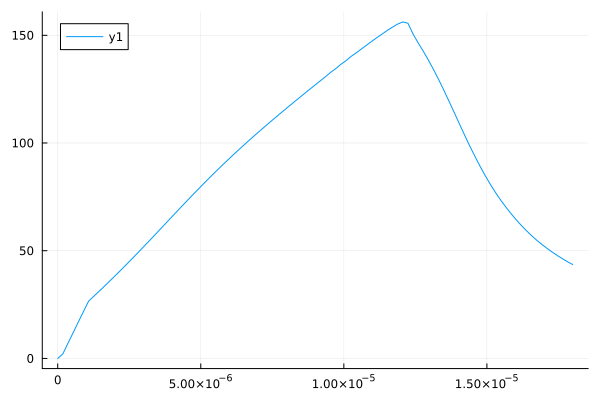

In [49]:
plot(Displacement,-(Load)*1e-3)

In [50]:
maximum(-Load*1e-3)

156.20154527273468

In [51]:
cd("../DataLoadDispResultNotchedPlate")

In [52]:
using DelimitedFiles
Disp = writedlm("DispDataResult0mmEccentricNotchedBeam_50_20000V.csv",  Displacement, ',')
Force = writedlm("LoadDataResult0mmEccentricNotchedBeam_50_20000V.csv",  Load, ',')